In [39]:
##Import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 350)
pd.set_option('display.max_colwidth', -1) 
pd.set_option("display.max_rows", 300)
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker


# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

from sklearn.compose import make_column_transformer


import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

from scipy import stats
from scipy.stats import norm, kurtosis, skew

# Import specific libraries
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('expand_frame_repr', False)



In [40]:
##FILTRAR: mas_cols  = all_data.filter(like='Mas', axis=1).columns

In [41]:
#Loading updated dataset

%store -r all_data
%store -r y_train
%store -r data_b
%store -r data_pool

In [42]:
all_data.isnull().sum().sum()

0

In [43]:
###CORRELATION ANALYSIS WITH TARGET

In [44]:
data = all_data.iloc[:len(y_train), :]
data["SalePrice"] = y_train
corr = data.corr()
# best_corr = corr[abs(corr()["SalePrice"]) > 0.26]

In [46]:
corr.isnull().sum()

LotFrontage              5  
LotArea                  5  
Street                   5  
LotShape                 5  
LandSlope                5  
OverallQual              5  
OverallCond              5  
YearBuilt                5  
YearRemodAdd             5  
MasVnrArea               5  
ExterQual                5  
ExterCond                5  
BsmtQual                 5  
BsmtCond                 5  
BsmtExposure             5  
BsmtFinType1             5  
BsmtFinSF1               5  
BsmtFinType2             5  
BsmtFinSF2               5  
BsmtUnfSF                5  
TotalBsmtSF              5  
HeatingQC                5  
CentralAir               5  
1stFlrSF                 5  
2ndFlrSF                 5  
LowQualFinSF             5  
GrLivArea                5  
BsmtFullBath             5  
BsmtHalfBath             5  
FullBath                 5  
HalfBath                 5  
BedroomAbvGr             5  
KitchenAbvGr             5  
KitchenQual              5  
TotRmsAbvGrd  

In [12]:
# import lr_module_mae 
# from lr_module_mae  import Linear_Regression
# #Generamos X e y
# y = np.log1p(data["SalePrice"]) #se transformó el target


# #Rescaling X
# scale = RobustScaler()
# X = scale.fit_transform(data[["ConstructArea"]])

# dataset_mae = pd.DataFrame(X, columns = ["ConstructArea"])
# dataset_mae["SalePrice"] = y.to_frame()

In [13]:
best_corr = corr[abs(corr["SalePrice"]) > 0.26]["SalePrice"]

In [14]:
best_corr.sort_values(ascending = False)[:15] ##lista de los 10 mejor correlacionados con precio

SalePrice           1.0000
ConstructArea       0.8597
TotalPoints         0.8460
OverallQual         0.7934
BsmtSFMultPoints    0.7762
GrLivArea           0.7344
GarageArea_x_Car    0.7074
ExterQual           0.6839
TotalExtraPoints    0.6786
TotalBsmtSF_x_Bsm   0.6756
KitchenQual         0.6614
GarageCars          0.6476
GarageArea          0.6441
TotalBsmtSF         0.6430
TotBathrooms        0.6389
Name: SalePrice, dtype: float64

In [15]:
reg_col = best_corr.sort_values(ascending = False)[:11].index
reg_col

Index(['SalePrice', 'ConstructArea', 'TotalPoints', 'OverallQual',
       'BsmtSFMultPoints', 'GrLivArea', 'GarageArea_x_Car', 'ExterQual',
       'TotalExtraPoints', 'TotalBsmtSF_x_Bsm', 'KitchenQual'],
      dtype='object')

In [16]:
filter = data.corr()[reg_col]
filter.loc[filter.index == "GrLivArea", :].max().max()

1.0

In [17]:
filter

,SalePrice,ConstructArea,TotalPoints,OverallQual,BsmtSFMultPoints,GrLivArea,GarageArea_x_Car,ExterQual,TotalExtraPoints,TotalBsmtSF_x_Bsm,KitchenQual
LotFrontage,0.3577,0.3964,0.2498,0.2250,0.2896,0.3420,0.3242,0.1516,0.2367,0.3319,0.1630
LotArea,0.3506,0.3713,0.1878,0.1560,0.2541,0.3297,0.2494,0.0828,0.1980,0.2998,0.1140
Street,0.0416,0.0274,0.0345,0.0323,0.0093,0.0461,-0.0223,0.0826,0.0546,0.0129,0.0604
LotShape,-0.2603,-0.2236,-0.2149,-0.1892,-0.2022,-0.1938,-0.1696,-0.1795,-0.2119,-0.1580,-0.1520
LandSlope,-0.0230,-0.0244,0.0361,0.0730,-0.0159,-0.0366,0.0167,0.0990,0.0118,-0.0154,0.0396
OverallQual,0.7934,0.7126,0.9705,1.0000,0.6625,0.5957,0.6240,0.7229,0.6737,0.5318,0.6711
OverallCond,-0.0767,-0.1483,-0.0510,-0.0925,-0.2135,-0.0829,-0.1823,-0.1390,-0.0493,-0.1701,-0.0235
YearBuilt,0.5227,0.4086,0.5882,0.5694,0.5651,0.2022,0.4978,0.5922,0.4496,0.3518,0.5242
YearRemodAdd,0.5058,0.3780,0.5763,0.5482,0.4361,0.2881,0.4258,0.5848,0.4955,0.2740,0.6226
MasVnrArea,0.4798,0.5605,0.4168,0.3979,0.4013,0.3662,0.4079,0.3325,0.3076,0.3551,0.2697


In [18]:
viejo = ['FireplaceQu', 'BsmtSFPoints', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'OverallQual', 'GrLivArea', 
               'TotalBsmtSF_x_Bsm', '1stFlrSF', 'PoolArea', 'LotArea', 'SaleCondition_Partial', 'Exterior1st_VinylSd',
               'GarageCond', 'HouseStyle_2Story', 'BsmtSFMultPoints', 'ScreenPorch', 'LowQualFinSF', 'BsmtFinSF2',
               'TSsnPorch']

In [19]:
filter.loc[filter.index == "GarageArea_x_Car", :].max().max()

1.0

In [20]:
#3Extraer los indexes que tienen mayores valores de correlacion con los best
highest = []
f_col = list(set(filter.index) - set(reg_col))
for c in f_col:
    if (filter.loc[filter.index == c, :].max().max() > 0.7):
        highest.append(c)
highest, len(highest)

(['GarageArea',
  'Fireplaces',
  'TotalBsmtSF',
  'BsmtSFPoints',
  'GarageCars',
  'BsmtQual',
  '1stFlrSF',
  'FireplaceQu',
  'TotRmsAbvGrd'],
 9)

In [21]:
f_col

['FullBath',
 'HalfBath',
 'Exterior2nd_CBlock',
 'Neighborhood_MeadowV',
 'Condition2_PosN',
 'Neighborhood_Somerst',
 'MSSubClass_60',
 'BsmtHalfBath',
 'GarageArea',
 'Heating_Grav',
 'MSZoning_RL',
 'Condition1_Feedr',
 'Condition2_PosA',
 'BldgType_Twnhs',
 'MSSubClass_30',
 'LandContour_HLS',
 'Neighborhood_Veenker',
 'RoofMatl_WdShake',
 'Functional',
 'HouseStyle_2.5Fin',
 'LandSlope',
 'GarageNewest',
 'TotalPorch',
 'HouseStyle_SLvl',
 'Exterior1st_HdBoard',
 'GarageYrBlt',
 'MSSubClass_90',
 'Exterior2nd_Stone',
 'MoSold_2',
 'MSSubClass_180',
 'Fireplaces',
 'Exterior1st_BrkComm',
 'PoolQC',
 'LotConfig_FR2',
 'MoSold_11',
 'Exterior1st_VinylSd',
 'Heating_Wall',
 'TotalBsmtSF',
 'RoofMatl_Membran',
 'Fence',
 'MoSold_9',
 'Exterior1st_Wd Sdng',
 'PavedDrive',
 'MoSold_12',
 'Condition2_RRAe',
 'Neighborhood_IDOTRR',
 'Exterior1st_MetalSd',
 'MSSubClass_70',
 'SaleType_WD',
 'CentralAir',
 '3SsnPorch',
 'Neighborhood_OldTown',
 'Neighborhood_CollgCr',
 'MiscVal',
 'MSSubCla

In [22]:
list(set(viejo) - set(highest))

['ScreenPorch',
 'LotArea',
 'Exterior1st_VinylSd',
 'BsmtSFMultPoints',
 'SaleCondition_Partial',
 'TSsnPorch',
 'HouseStyle_2Story',
 'OverallQual',
 'PoolArea',
 'TotalBsmtSF_x_Bsm',
 'LowQualFinSF',
 'GrLivArea',
 'GarageCond',
 'BsmtFinSF2']

In [23]:
def correlation_search(data, thres): ##input: dataframe de correlacion df.corr()
    #Create summary table for examining correlation between features (collinearity)
    cols = ["Feat_1", "Feat_2", "Correlation"]
    a = pd.DataFrame(columns = cols)
    co = data.columns
    for c in co:
        frame = data.loc[abs(data[c] > thres) & (data[c] < 1), [c]]
        if not frame.empty:
            f_i = frame.index
            #LLeno la tabla
            for i in f_i:
                #print(c, i, data.loc[i, c] )
                a = a.append({"Feat_1":c, "Feat_2": i, "Correlation":frame.loc[i, c]}, ignore_index = True)
    a = a.set_index(['Feat_1','Feat_2']).stack().drop_duplicates().unstack().reset_index() #evito que se repitan cruzados
    a = a.sort_values(by = "Correlation", ascending = False)
    return a
       
        

In [24]:

reg_col= reg_col.drop("SalePrice")

In [25]:

a = correlation_search(data.corr(), thres= 0)

In [26]:
a.loc[a["Feat_1"]== "TotalBsmtSF"]

,Feat_1,Feat_2,Correlation
2406,TotalBsmtSF,TotalBsmtSF_x_Bsm,0.9425
2411,TotalBsmtSF,BsmtSFMultPoints,0.8871
2381,TotalBsmtSF,1stFlrSF,0.8022
2407,TotalBsmtSF,ConstructArea,0.7692
2461,TotalBsmtSF,SalePrice,0.6430
2403,TotalBsmtSF,TotalPoints,0.6019
2410,TotalBsmtSF,BsmtSFPoints,0.5989
2405,TotalBsmtSF,GarageArea_x_Car,0.5157
2393,TotalBsmtSF,GarageArea,0.4836
2392,TotalBsmtSF,GarageCars,0.4582


In [27]:
a.loc[(a["Feat_1"] == "ConstructArea") | (a["Feat_2"] == "ConstructArea")] ## analisis de correlac con primer best

,Feat_1,Feat_2,Correlation
6060,ConstructArea,SalePrice,0.8597
3000,GrLivArea,ConstructArea,0.8391
5923,TotalBsmtSF_x_Bsm,ConstructArea,0.7846
2407,TotalBsmtSF,ConstructArea,0.7692
6003,ConstructArea,BsmtSFMultPoints,0.7679
2724,1stFlrSF,ConstructArea,0.7498
5682,TotalPoints,ConstructArea,0.7497
5846,GarageArea_x_Car,ConstructArea,0.7303
736,OverallQual,ConstructArea,0.7126
4549,GarageArea,ConstructArea,0.7016


In [28]:
a.loc[(a["Feat_1"] == "TotalPoints") | (a["Feat_2"] == "TotalPoints")]

,Feat_1,Feat_2,Correlation
732,OverallQual,TotalPoints,0.9705
5736,TotalPoints,SalePrice,0.8460
1298,ExterQual,TotalPoints,0.7589
5682,TotalPoints,ConstructArea,0.7497
5686,TotalPoints,BsmtSFMultPoints,0.7468
5679,TotalPoints,TotalExtraPoints,0.7429
5685,TotalPoints,BsmtSFPoints,0.7239
3712,KitchenQual,TotalPoints,0.7208
1511,BsmtQual,TotalPoints,0.6855
5680,TotalPoints,GarageArea_x_Car,0.6580


In [29]:
a

,Feat_1,Feat_2,Correlation
5401,PoolArea,MiscFeature_Pool,0.9911
10603,SaleType_New,SaleCondition_Partial,0.9864
7177,MSSubClass_190,BldgType_2fmCon,0.9816
9865,Exterior1st_VinylSd,Exterior2nd_VinylSd,0.9776
9737,Exterior1st_CemntBd,Exterior2nd_CmentBd,0.9729
...,...,...,...
5439,PoolQC,GarageType_Attchd,0.0001
2208,BsmtFinSF2,Neighborhood_Crawfor,0.0001
3044,GrLivArea,Exterior2nd_AsphShn,0.0000
1027,YearBuilt,Neighborhood_BrDale,0.0000


In [30]:
# # #first import the module
# import lr_module_mae
# #importing the class Linear_Regression
# from lr_module_mae import Linear_Regression 
# #Rescaling and transforming
# scale = RobustScaler()
# r_c = reg_col.drop("SalePrice")
# t = all_data[r_c]
# t = t.iloc[:len(y_train), :]
# t[r_c] = scale.fit_transform(t[r_c])
# t["SalePrice"] = np.log1p(y_train)
# reg_mae = Linear_Regression(dataset = t, n_iter= 100000, alpha =0.1)
# print(reg_mae.regressor(summary = True))

In [31]:
all_data.shape, y_train.shape

((2905, 240), (1460, 1))

In [32]:
viejo = ['FireplaceQu', 'BsmtSFPoints', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'OverallQual', 'GrLivArea', 
               'TotalBsmtSF_x_Bsm', '1stFlrSF', 'PoolArea', 'LotArea', 'SaleCondition_Partial', 'Exterior1st_VinylSd',
               'GarageCond', 'HouseStyle_2Story', 'BsmtSFMultPoints', 'ScreenPorch', 'LowQualFinSF', 'BsmtFinSF2',
               'TSsnPorch']
len(viejo)

20

In [33]:
a

,Feat_1,Feat_2,Correlation
5401,PoolArea,MiscFeature_Pool,0.9911
10603,SaleType_New,SaleCondition_Partial,0.9864
7177,MSSubClass_190,BldgType_2fmCon,0.9816
9865,Exterior1st_VinylSd,Exterior2nd_VinylSd,0.9776
9737,Exterior1st_CemntBd,Exterior2nd_CmentBd,0.9729
...,...,...,...
5439,PoolQC,GarageType_Attchd,0.0001
2208,BsmtFinSF2,Neighborhood_Crawfor,0.0001
3044,GrLivArea,Exterior2nd_AsphShn,0.0000
1027,YearBuilt,Neighborhood_BrDale,0.0000


In [34]:
a["Feat_1"].value_counts().index

Index(['Street', 'FullBath', 'LotFrontage', 'LotArea', 'BsmtCond', 'LandSlope',
       'CentralAir', 'YearBuilt', 'OverallQual', 'BsmtFinType1',
       ...
       'MoSold_5', 'MiscFeature_Othr', 'MoSold_2', 'SaleType_New',
       'SaleType_Con', 'SaleType_CWD', 'SaleType_ConLw', 'SaleType_ConLI',
       'SaleType_ConLD', 'SaleCondition_Partial'],
      dtype='object', length=228)

In [35]:
viejo

['FireplaceQu',
 'BsmtSFPoints',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars',
 'OverallQual',
 'GrLivArea',
 'TotalBsmtSF_x_Bsm',
 '1stFlrSF',
 'PoolArea',
 'LotArea',
 'SaleCondition_Partial',
 'Exterior1st_VinylSd',
 'GarageCond',
 'HouseStyle_2Story',
 'BsmtSFMultPoints',
 'ScreenPorch',
 'LowQualFinSF',
 'BsmtFinSF2',
 'TSsnPorch']

In [36]:
a[a["Feat_1"] == "BsmtSFPoints"]

,Feat_1,Feat_2,Correlation
6330,BsmtSFPoints,BsmtSFMultPoints,0.8089
6385,BsmtSFPoints,SalePrice,0.6386
6331,BsmtSFPoints,TotBathrooms,0.5809
6371,BsmtSFPoints,Foundation_PConc,0.5390
6375,BsmtSFPoints,GarageType_Attchd,0.3748
6366,BsmtSFPoints,Exterior1st_VinylSd,0.3554
6368,BsmtSFPoints,Exterior2nd_VinylSd,0.3554
6346,BsmtSFPoints,Neighborhood_NridgHt,0.3251
6374,BsmtSFPoints,Electrical_SBrkr,0.3007
6370,BsmtSFPoints,MasVnrType_Stone,0.2905


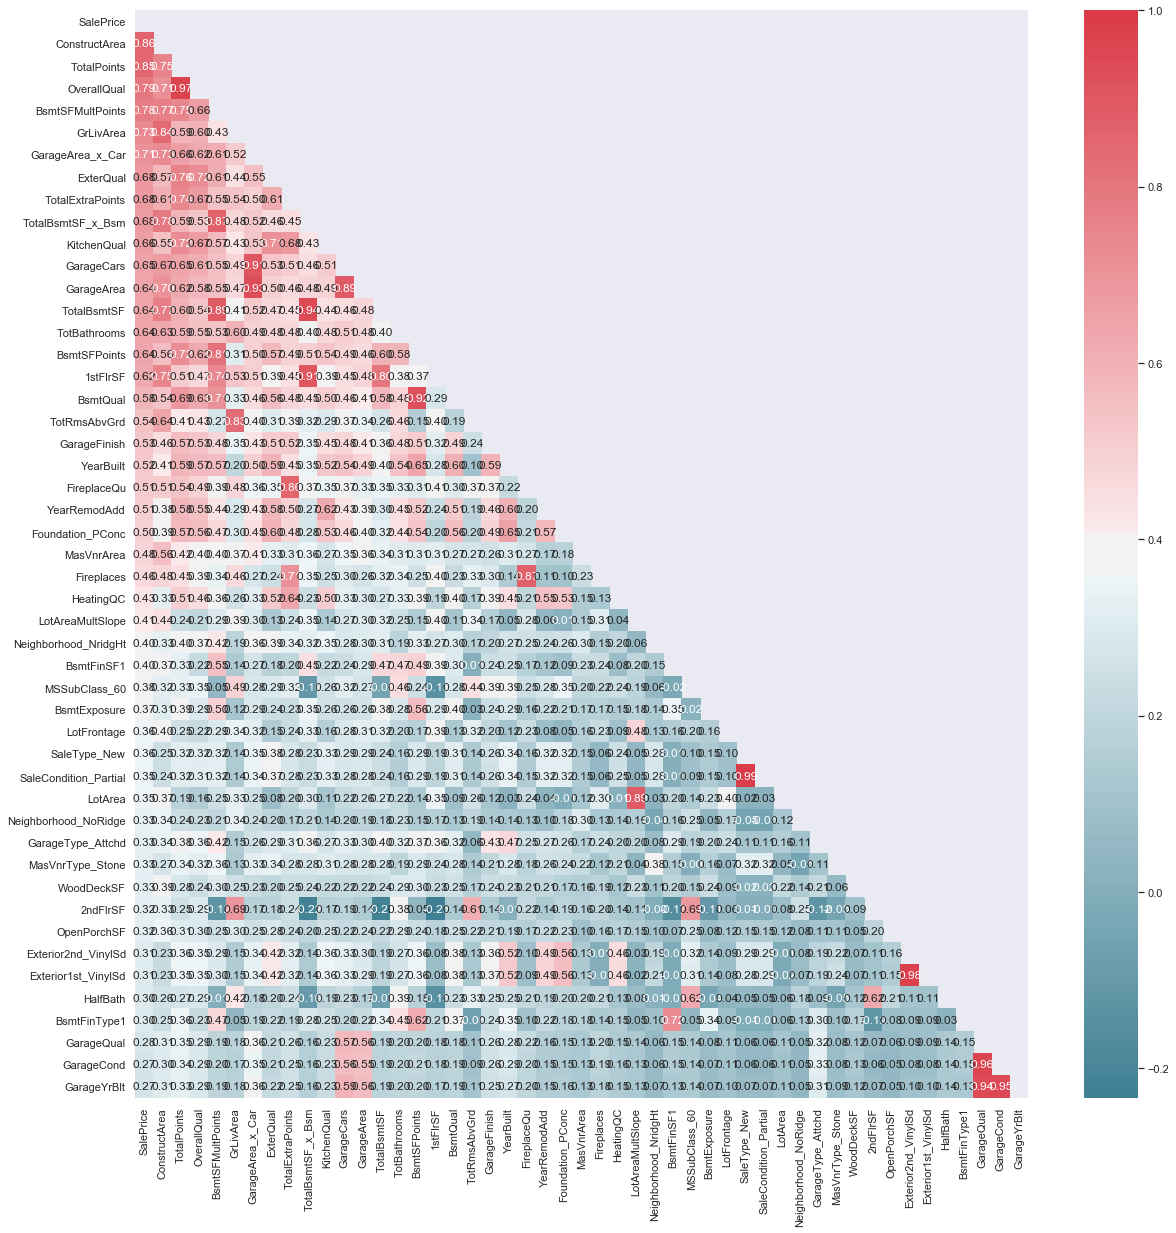

In [37]:

corr = data.corr()
top_corr_cols = corr[abs((corr.SalePrice)>=.26)].SalePrice.sort_values(ascending=False).keys()
top_corr = corr.loc[top_corr_cols, top_corr_cols]
dropSelf = np.zeros_like(top_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
plt.figure(figsize=(20, 20))
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)
sns.set(font_scale=0.15)
plt.show()
del corr, dropSelf, top_corr

In [38]:
yo = [
 
 
 
 


 'PoolArea',
 'HouseStyle_2Story',
 'BsmtSFMultPoints',
 'ScreenPorch',
 'LowQualFinSF',
 'BsmtFinSF2',
 'TSsnPorch'] fireplaces, totrmsavdgr,bsmtqual

SyntaxError: invalid syntax (<ipython-input-38-32b4c607db23>, line 14)

In [ ]:
viejo

In [ ]:
####Revisar para generar viejo: chequear puntos rojos (sobre .8) y eliminar el que tenga menor
#correlacion con SalePrice

In [ ]:
#Block analysis
corr = data.corr()
corr

In [ ]:
viejo 

In [ ]:
def correlation_search(data, thres): ##input: dataframe de correlacion df.corr()
    #Create summary table for examining correlation between features (collinearity)
    cols = ["Feat_1", "Feat_2", "Correlation"]
    a = pd.DataFrame(columns = cols)
    b = pd.DataFrame(columns = cols)
    co = data.columns
    for c in co:
        frame = data.loc[abs(data[c] > thres) & (data[c] < 1), [c]]
        if not frame.empty:
            f_i = frame.index
            #LLeno la tabla
            for i in f_i:
                #print(c, i, data.loc[i, c] )
                a = a.append({"Feat_1":c, "Feat_2": i, "Correlation":frame.loc[i, c]}, ignore_index = True)
    a = a.set_index(['Feat_1','Feat_2']).stack().drop_duplicates().unstack().reset_index() #evito que se repitan cruzados
    ##Summary of the highest correlations by feature
    for feat in a["Feat_1"].unique():
       b = b.append(a.loc[a["Feat_1"] == feat, :].sort_values(by = "Correlation", ascending = False)[:1])
#     a = a.sort_values(by = "Correlation", ascending = False)
    return a, b

In [ ]:
a, b = correlation_search(data.corr(), 0.8)

In [ ]:
b

In [ ]:
viejo

In [ ]:
reg_col ##mejores correlaciones con target

In [ ]:
a.loc[a["Feat_1"] == "PoolArea",:].sort_values(by = "Correlation", ascending = False)

In [ ]:
selec = ["BsmtSFMultPoints","OveralQuall", "GrLivArea",   ]

In [ ]:
data.corr()["SalePrice"].sort_values(ascending = False)[:15]

In [ ]:
a.sort_values(by = "Correlation", ascending = False)

In [ ]:
max_viejo = ["TotalPoints", "ConstructArea", "TotalExtraPoints", "GarageArea_x_Car", "TotBathrooms", "ExterQual",
            "KitchenQual", "BsmtQual", "GarageFinish", "TotRmsAbvGrd", "Foundation_PConc", "Fireplaces", "HeatingQC"]

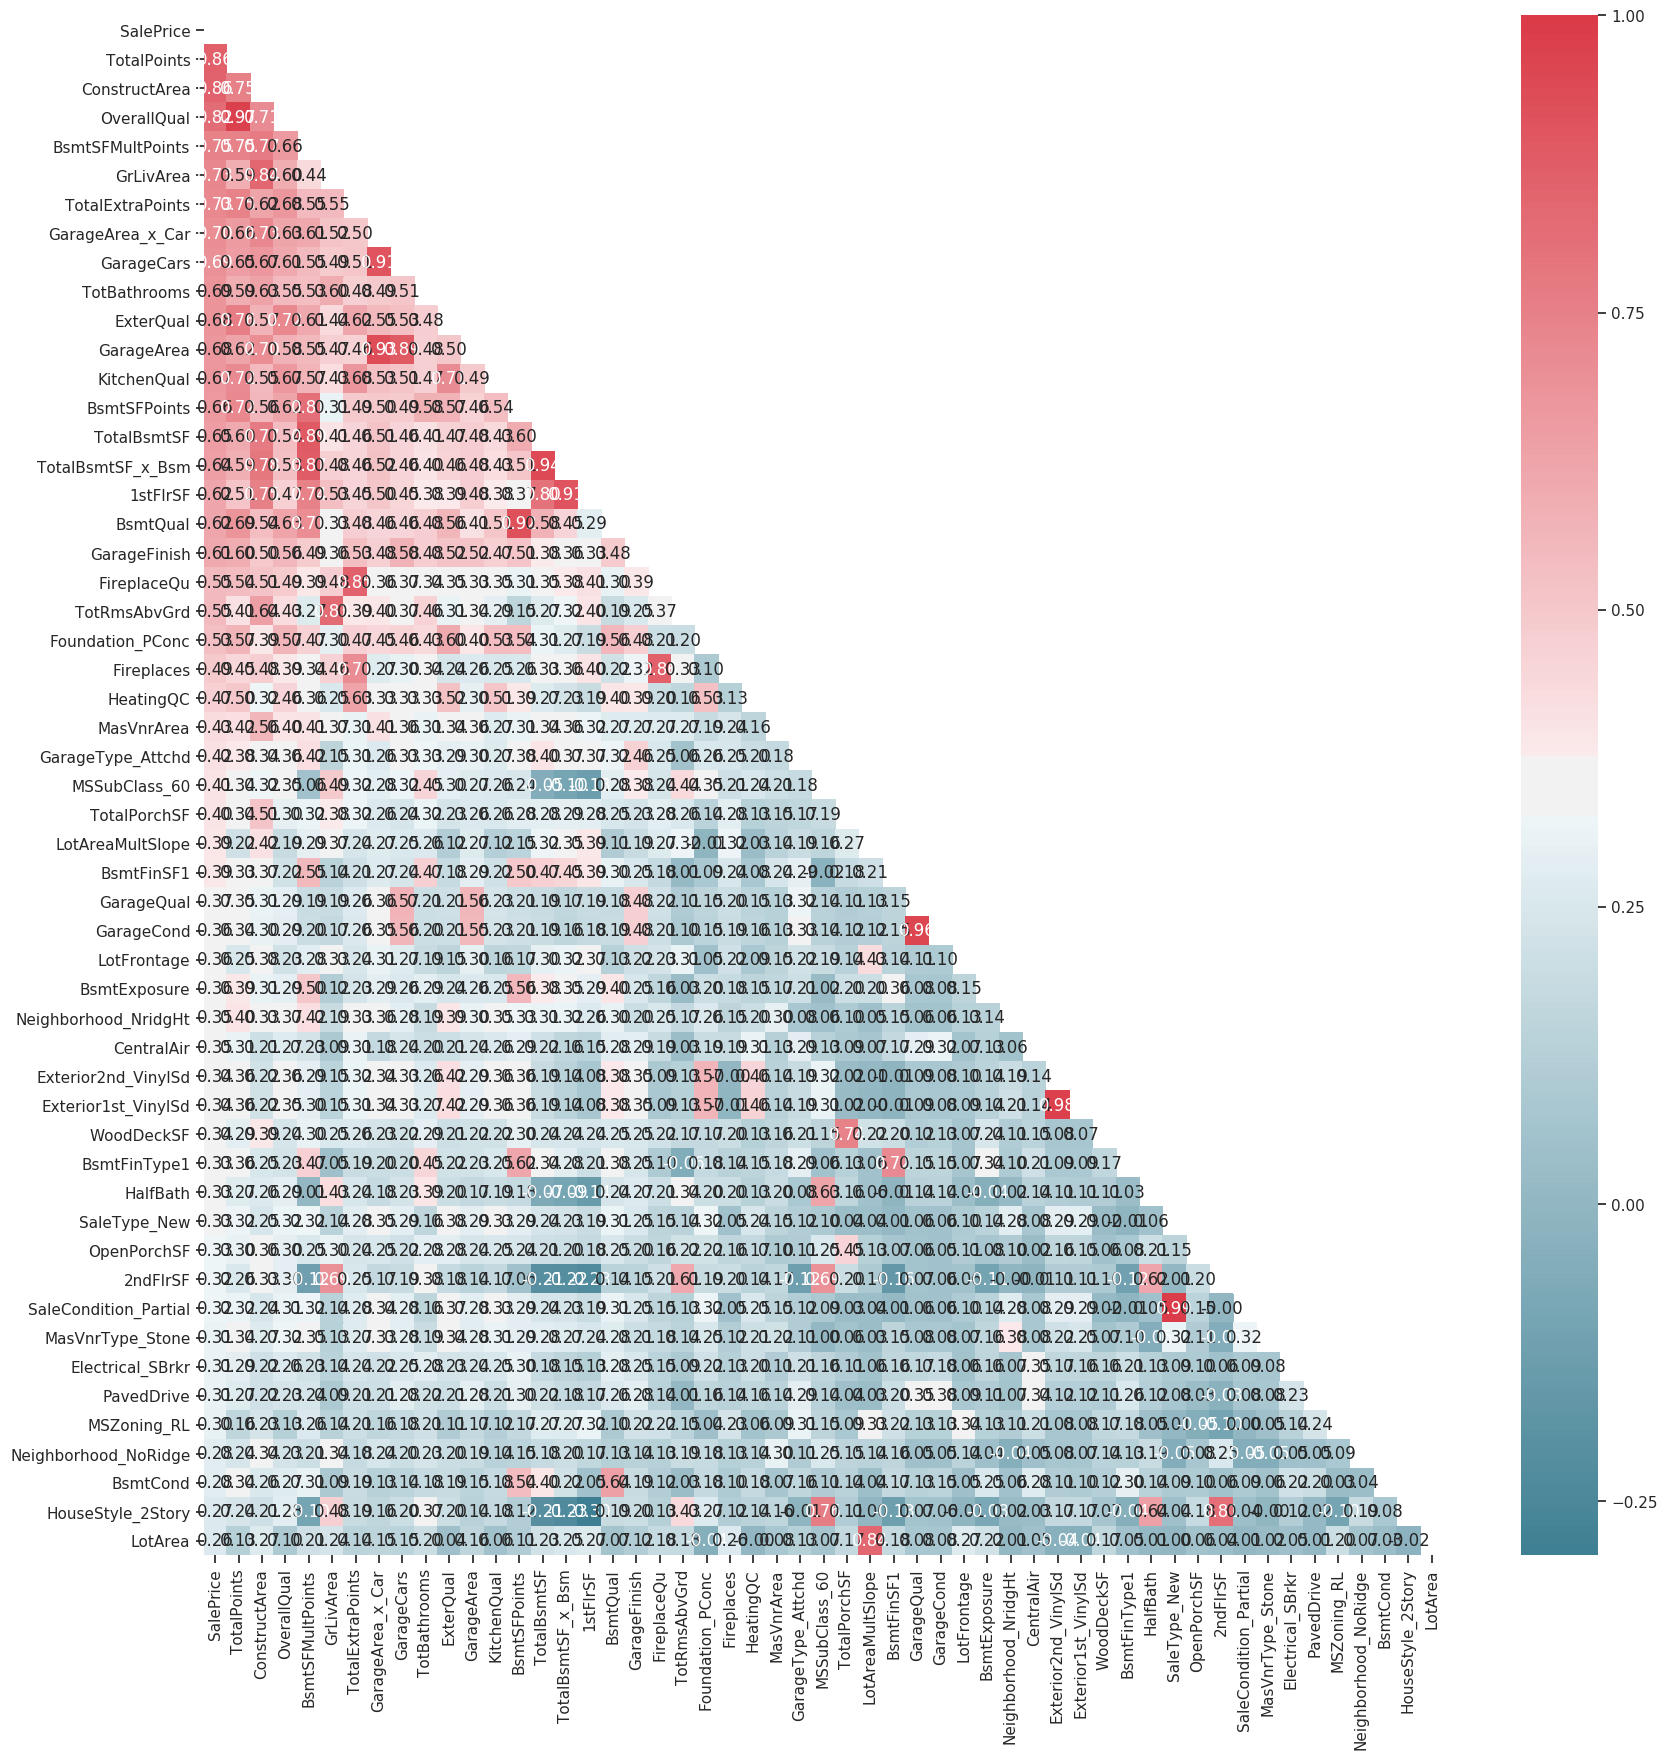

In [ ]:
v_2 = ["LotArea", "HouseStyle_2Story", "SaleCondition_Partial", "BsmtCond", "2ndFlrSF", "HalfBath", "BsmtFinType1",
      "WoodDeckSF", "Exterior1st_VinylSd", "Exterior2nd_VinylSd", "BsmtExposure", "GarageCond", "GarageQual", "LotAreaMultSlope",
      "TotalPorchSF", "MSSubClass_60", "GarageType_Attchd", "MasVnrArea", "HeatingQC", "Fireplaces"]

In [ ]:
['FireplaceQu',
 'BsmtSFPoints',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars',
 'TotalBsmtSF_x_Bsm',
 '1stFlrSF',
 'PoolArea',
 'LotArea',
 'SaleCondition_Partial',
 'Exterior1st_VinylSd',
 'GarageCond',
 'HouseStyle_2Story',
 'ScreenPorch',
 'LowQualFinSF',
 'BsmtFinSF2',
 'TSsnPorch']

In [ ]:
len(v_2)

In [ ]:
list(set(viejo) - set(v_2))

In [ ]:
data.shape